In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 数据读取并处理异常数据
path = "datas/breast-cancer-wisconsin.data"
names = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
        'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

df = pd.read_csv(path, header=None,names=names)

datas = df.replace('?', np.nan).dropna(how = 'any') # 只要有列为空，就进行删除操作
datas.head(5) ## 显示一下

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# 1. 数据提取以及数据分隔
## 提取
X = datas[names[1:10]]
Y = datas[names[10]]

## 分隔
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [5]:
# 2. 数据格式化(归一化)
ss = StandardScaler()
X_train = ss.fit_transform(X_train) ## 训练模型及归一化数据

In [6]:
# 3. 模型构建及训练
## penalty: 过拟合解决参数,l1或者l2

## solver: 参数优化方式
### 当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；
### 当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)

## multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
### ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类
### multinomial: many-vs-many（MVM）,对于多元分类问题，如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，
#### 不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，
#### 进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类

## class_weight: 特征权重参数
lr = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-2, 2, 20), cv=2, penalty='l2', solver='lbfgs', tol=0.01)
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([  1.00000e-02,   1.62378e-02,   2.63665e-02,   4.28133e-02,
         6.95193e-02,   1.12884e-01,   1.83298e-01,   2.97635e-01,
         4.83293e-01,   7.84760e-01,   1.27427e+00,   2.06914e+00,
         3.35982e+00,   5.45559e+00,   8.85867e+00,   1.43845e+01,
         2.33572e+01,   3.79269e+01,   6.15848e+01,   1.00000e+02]),
           class_weight=None, cv=2, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [7]:
# 4. 模型效果获取
r = lr.score(X_train, Y_train)
print "R值（准确率）：", r
print "稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100)
print "参数：",lr.coef_
print "截距：",lr.intercept_

R值（准确率）： 0.970684039088
稀疏化特征比率：0.00%
参数： [[ 1.3926311   0.17397478  0.65749877  0.8929026   0.36507062  1.36092964
   0.91444624  0.63198866  0.75459326]]
截距： [-1.02717163]


In [11]:
# 5. 模型相关信息保存
## 引入包
from sklearn.externals import joblib
## 要求文件夹必须存在
joblib.dump(ss, "ss.model") ## 将标准化模型保存
joblib.dump(lr, "lr.model") ## 将模型保存

['lr.model']

In [12]:
# 模型加载
## 引入包
from sklearn.externals import joblib
oss = joblib.load("ss.model")
olr = joblib.load("lr.model")

In [13]:
# 数据预测
## a. 预测数据格式化(归一化)
X_test = oss.transform(X_test) # 使用模型进行归一化操作
## b. 结果数据预测
Y_predict = olr.predict(X_test)

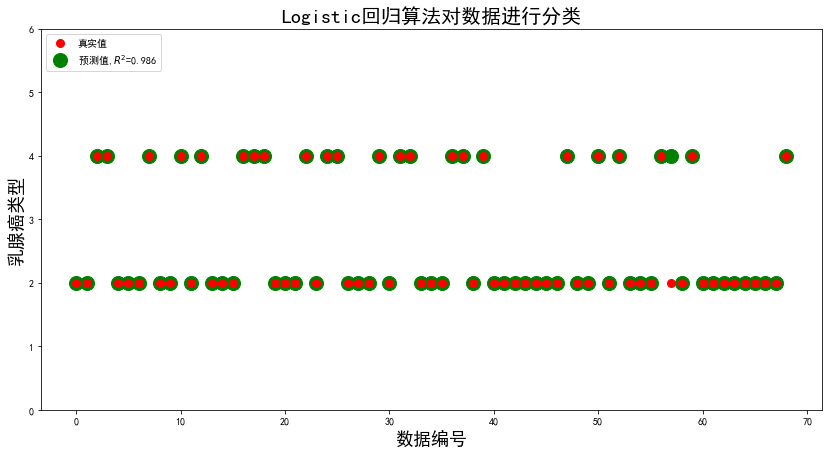

In [14]:
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(0,6)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 14, zorder=2, label=u'预测值,$R^2$=%.3f' % olr.score(X_test, Y_test))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'乳腺癌类型', fontsize=18)
plt.title(u'Logistic回归算法对数据进行分类', fontsize=20)
plt.show()

In [15]:
print Y_test
print Y_predict

115    2
392    2
316    4
519    4
313    2
505    2
77     2
506    4
485    2
573    2
14     4
161    2
187    4
533    2
584    2
148    2
237    4
253    4
344    4
70     2
199    2
81     2
146    4
554    2
329    4
467    4
542    2
8      2
512    2
32     4
      ..
124    4
78     2
243    2
394    2
548    2
504    2
694    2
250    2
456    4
557    2
609    2
206    4
406    2
52     4
624    2
423    2
650    2
251    4
1      2
418    2
435    4
171    2
443    2
242    2
583    2
162    2
193    2
341    2
280    2
38     4
Name: Class, dtype: int64
[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4]
